# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [411]:
# sklearn packages
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler ,minmax_scale, PolynomialFeatures, StandardScaler

# Statsmodels
from statsmodels.formula.api import ols

# utility libraries 
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import warnings 

# filter warnings
warnings.filterwarnings("ignore")

# magic inline
%matplotlib inline


## Step 1: Read in Data

In [412]:
df = pd.read_csv('kc_house_data_train.csv', index_col = 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style('darkgrid')
print(df)
df.head()

               id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0      2591820310  20141006T000000   365000.0         4       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1      7974200820  20140821T000000   865000.0         5       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2      7701450110  20140815T000000  1038000.0         4       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3      9522300010  20150331T000000  1490000.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [413]:
df.shape

(17290, 21)

In [414]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [415]:
df['price'] = df['price'].astype(float)

In [416]:
for i in df.columns:
    print("Statistics for each column/feature: {0}".format(i))
    print(df[i].describe())
    print("---------------------------------------------")

Statistics for each column/feature: id
count    1.729000e+04
mean     4.565502e+09
std      2.874656e+09
min      1.000102e+06
25%      2.114701e+09
50%      3.903650e+09
75%      7.301150e+09
max      9.900000e+09
Name: id, dtype: float64
---------------------------------------------
Statistics for each column/feature: date
count               17290
unique                371
top       20140623T000000
freq                  111
Name: date, dtype: object
---------------------------------------------
Statistics for each column/feature: price
count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
---------------------------------------------
Statistics for each column/feature: bedrooms
count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max   

In [417]:
print(df['price'].mean())
print(df['price'].count())
print(df['price'].min())
print(df['price'].max())

540739.5486408329
17290
75000.0
7700000.0


In [418]:
df['bedrooms'].describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

Skewness: 4.282599
Kurtosis: 38.520298


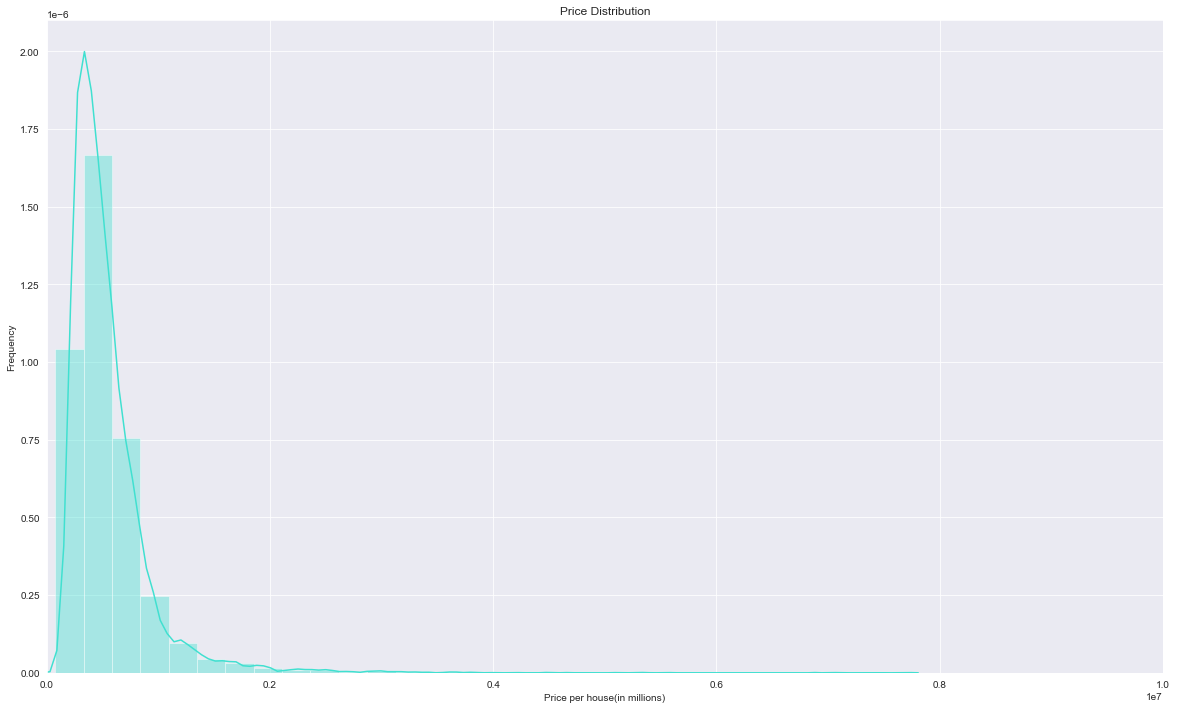

In [472]:
fig, ax = plt.subplots(figsize = (20,12))

sns.distplot(df['price'] , bins = 30, kde = True, color = 'turquoise')
ax.set(xlim = [0,10000001], xlabel = 'Price per house(in millions)', ylabel = 'Frequency', title = 'Price Distribution')

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

We can see from the distribution, the price is not normally distributed.ma hine 

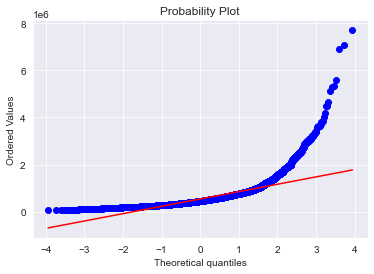

In [420]:
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

The skewness score of 4.28 is a confirmation that our prices deviate from the normal distribution by a lot. 
Looks like a normal distribution? Not quite! Looking at the kurtosis score, we see that we have a leptokurtic distribution with really heavy tails.

Lets try to take the log of price to see if our distribution becomes more normal

Skewness: 0.446582
Kurtosis: 0.767354


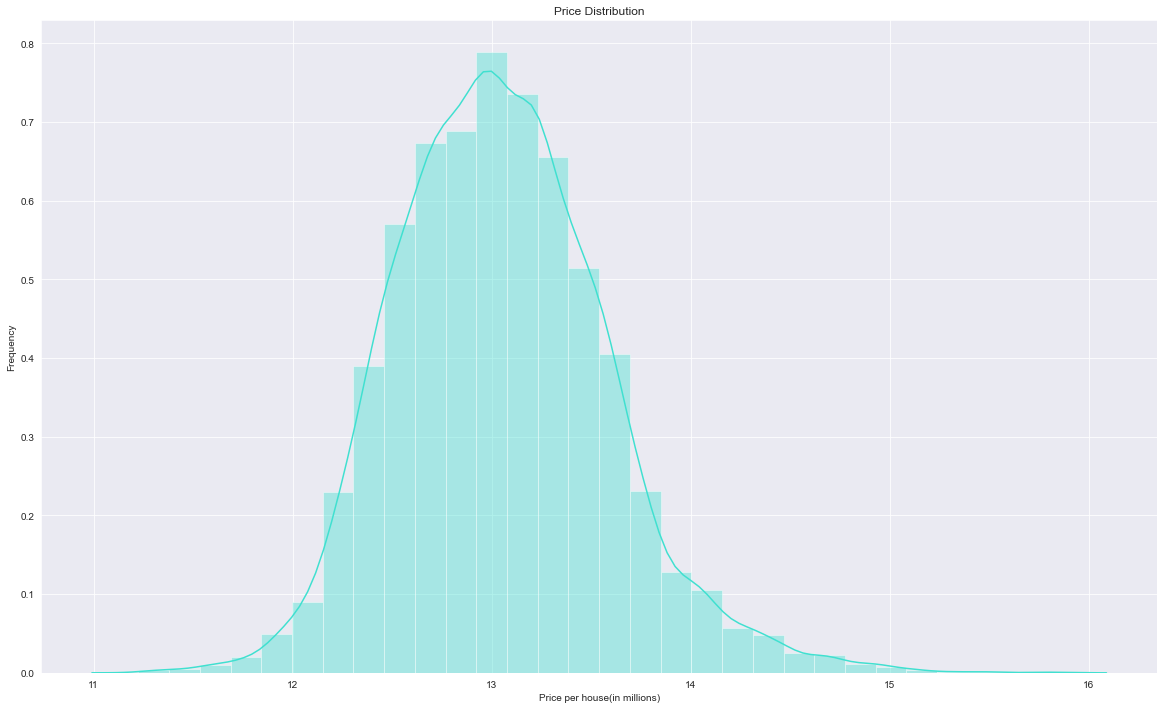

In [421]:
fig, ax = plt.subplots(figsize = (20,12))

sns.distplot(np.log(df.price),bins = 30, kde = True, color = 'turquoise')
ax.set(xlabel = 'Price per house(in millions)', ylabel = 'Frequency', title = 'Price Distribution')

print("Skewness: %f" % np.log(df.price).skew())
print("Kurtosis: %f" % np.log(df.price).kurt())

In [422]:
df.isna().sum().any()

False

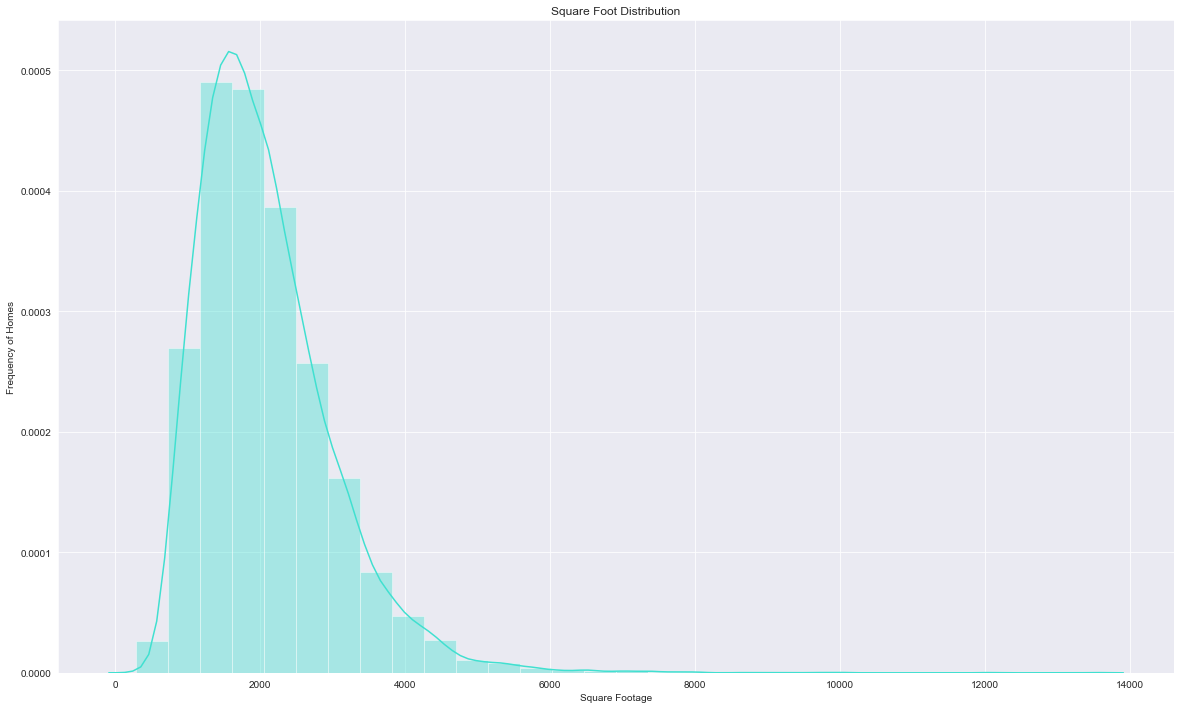

In [423]:
fig, ax = plt.subplots(figsize = (20,12));
sns.distplot(df['sqft_living'], kde=True, bins=30, color = 'turquoise');
ax.set(xlabel='Square Footage', ylabel='Frequency of Homes', title='Square Foot Distribution');

We have the smae looking distribution for square foot vs frequency, this may be a trend.

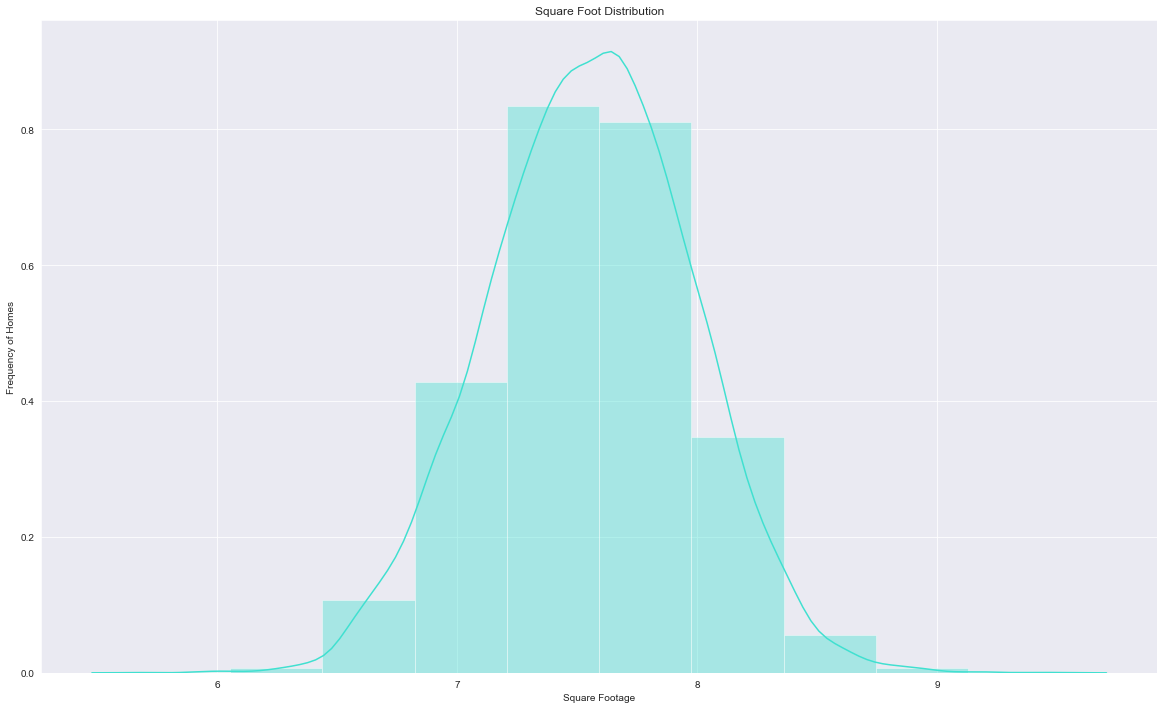

In [424]:
fig, ax = plt.subplots(figsize = (20,12));
sns.distplot(np.log(df['sqft_living']), kde=True, bins=10, color = 'turquoise');
ax.set(xlabel='Square Footage', ylabel='Frequency of Homes', title='Square Foot Distribution');

In [425]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

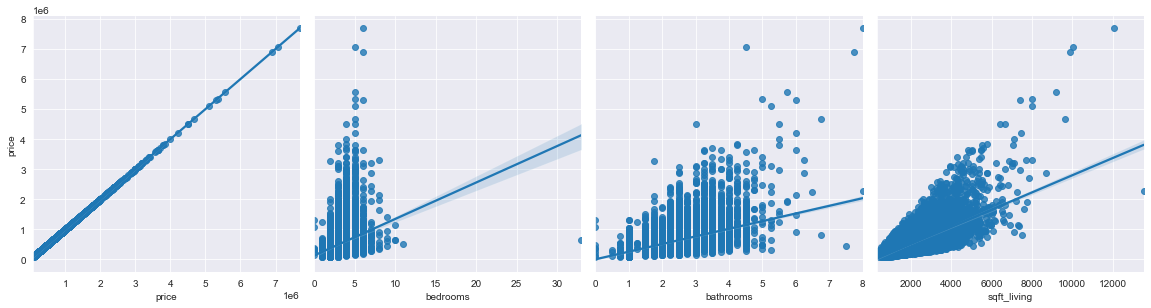

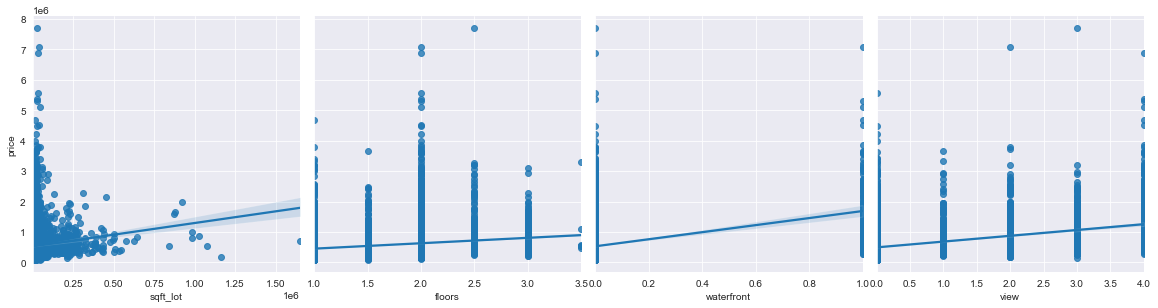

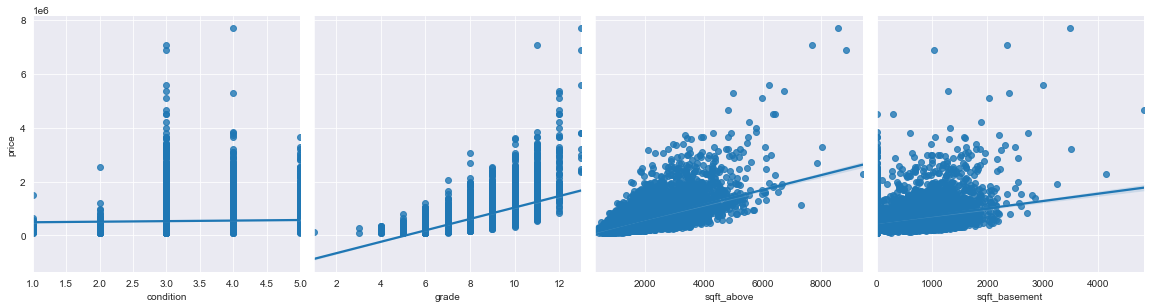

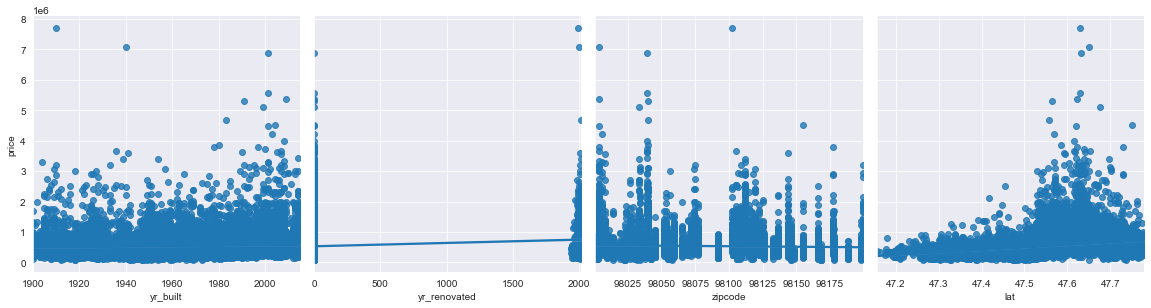

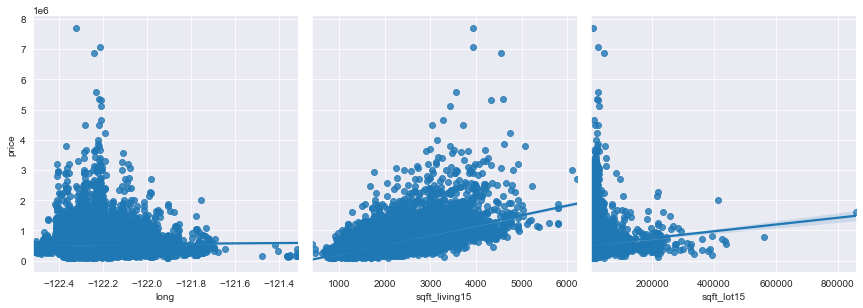

In [426]:
variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

n = 4

rows = [variables[i:i+n] for i in range(0, len(variables), n)]

for i in rows:
    graphs = sns.pairplot(data = df, y_vars = ['price'], x_vars = i, kind = 'reg', height = 4)

The only somewhat linear relationship that we can deduce is between price and sqft living

Lets take a look at bedrooms and bathrooms.

Text(1, 1, '2')

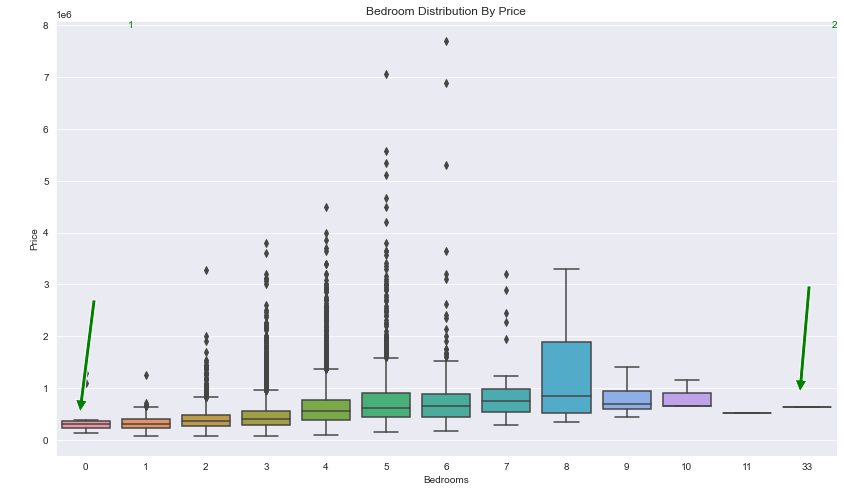

In [427]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.boxplot(x='bedrooms', y="price", data=df)

ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedroom Distribution By Price');

ax.annotate('1',color = 'green', xy=(80,80), xycoords='figure points', xytext=(0.1, 1), textcoords='axes fraction',
            arrowprops = dict(facecolor='g', shrink=0.7),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('2',color = 'green', xy=(800,100), xycoords='figure points', xytext=(1, 1), textcoords='axes fraction',
            arrowprops = dict(facecolor='g', shrink=0.7),
            horizontalalignment='right', verticalalignment='top')

If we look at the left hand side denoted by arrow 1, we see that there are houses with 1 bedroom which is a little odd.
If we look at the right hand side denoted by arrow 2, we see that there is a house with 33 bedrooms at a selling price of less than $100,000, that is also odd.

Text(0.1, 1, '1')

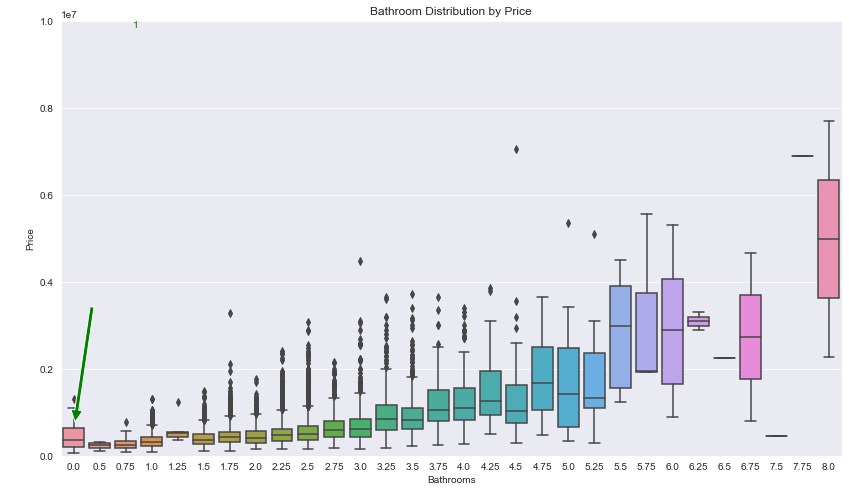

In [428]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.boxplot(x='bathrooms', y="price", data=df)

ax.set(xlabel='Bathrooms', ylabel='Price',title='Bathroom Distribution by Price', ylim = [0,10000000]);

ax.annotate('1',color = 'g', xy=(75, 70), xycoords='figure points', xytext=(0.1, 1), textcoords='axes fraction',
            arrowprops=dict(facecolor='g', shrink=0.7),
            horizontalalignment='right', verticalalignment='top')

If we look at the left hand side denoted by arrow 1, we see that there are houses that have 0 bathrooms, hence it is odd.

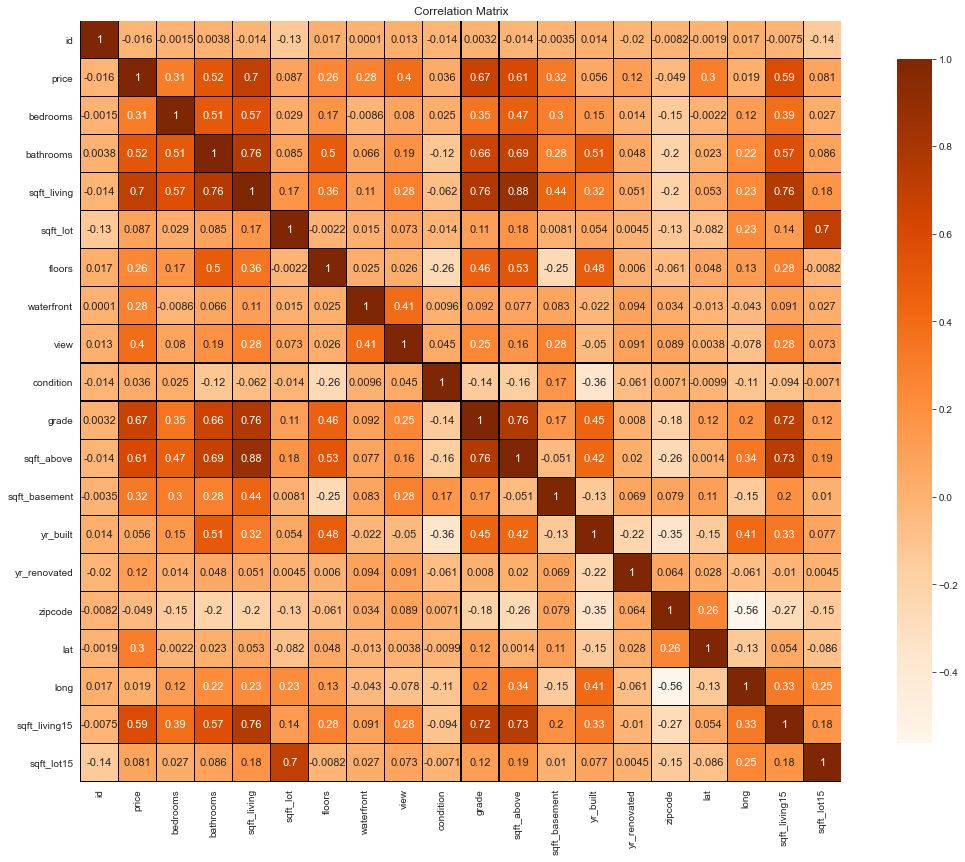

In [429]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Correlation Matrix')

sns.heatmap(df.corr(),linewidths=0.1,vmax=1,square=True,cmap="Oranges",
linecolor='black',annot=True,annot_kws={"size":11},cbar_kws={"shrink": .9});
plt.show()


## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [430]:
df[df.bedrooms > 15]
#df['bedrooms'] = df['bedrooms'].replace(['33'],'3')
df.at[8597, 'bedrooms'] = 3
print(df.loc[[8597]])

              id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
8597  2402100895  20140625T000000  640000.0         3       1.75         1620      6000     1.0           0     0          5      7        1040            580      1947             0    98103  47.6878 -122.331           1330        4700


Instead of dropping the home with 33 bedrooms, I change it to 3 as I assume it was a typo.

In [431]:
df.bathrooms.value_counts()
df[df.bathrooms == 0]
#df.drop(df.loc[df['bathrooms'] == 0].index, axis=0, inplace=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3032,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
5424,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
9060,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
9286,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
12982,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


Here we are dropping the rows that have 0 bathrooms as that would not be considered a home.

In [432]:
df.skew()

id                0.248019
price             4.282599
bedrooms          0.537476
bathrooms         0.536450
sqft_living       1.541422
sqft_lot         13.590861
floors            0.623358
waterfront       11.059798
view              3.370325
condition         1.037465
grade             0.775600
sqft_above        1.469528
sqft_basement     1.593867
yr_built         -0.461850
yr_renovated      4.568066
zipcode           0.407244
lat              -0.484994
long              0.892881
sqft_living15     1.114917
sqft_lot15        8.766265
dtype: float64

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [433]:
#We want to create a new column that shows us how old a house is
df['house_years_old'] = 2020 - df['yr_built']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_years_old
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,62
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,72
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,67
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,49


In [434]:
def dates(df):
    df['year_sold'] = df.date.apply(lambda x: int(x[1:4]))
    df['month_sold'] = df.date.apply(lambda x:int(x[4:6]))
    df.date = df.date.apply(lambda x: int(x[0:8]))
    df.date = pd.to_datetime(df.date, format = "%Y%m%d")
    return df
df = dates(df)

In [435]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34,14,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43,14,8
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23,14,8
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30,15,3
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16,14,7


In [436]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34,14,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43,14,8
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23,14,8
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30,15,3
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16,14,7


### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [437]:
df = pd.concat([df, pd.get_dummies(df['zipcode'], drop_first=True)], axis = 1)
df.drop('zipcode', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,34,14,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,43,14,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,23,14,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,30,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,16,14,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We have chosen Zipcode as our categorical variable

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

We have already touched upon year and month sold in the code above by creating new columns for year and month sold.

In [438]:
df.groupby('year_sold')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
year_sold,,,,,,,,
14,11703.0,541341.601299,377104.805515,78000.0,320000.0,450000.0,650000.0,7700000.0
15,5587.0,539478.438518,365291.881178,75000.0,325000.0,450000.0,637000.0,5350000.0


We can see that the only significant distinction between the two years is that 2014 home sales nearly dobuled those sold in 2015.

In [439]:
df.groupby('month_sold')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
month_sold,,,,,,,,
1,792.0,515932.273990,357427.500136,99000.0,312375.0,435000.0,615000.0,3567000.0
2,990.0,508686.988889,332116.780926,75000.0,307125.0,425000.0,600000.0,3065000.0
3,1496.0,537872.878342,349987.970912,85000.0,320000.0,450000.0,648250.0,3395000.0
4,1804.0,561916.902993,378827.228219,84000.0,336900.0,475750.0,662550.0,5350000.0
5,1928.0,553524.780602,378877.539497,78000.0,330000.0,463000.0,652625.0,4208000.0
6,1753.0,561750.456361,397781.710384,92000.0,329950.0,466800.0,672500.0,7062500.0
7,1761.0,545195.457694,349716.079713,86500.0,325000.0,464950.0,659000.0,3800000.0
8,1561.0,539761.679052,385784.830123,107000.0,319900.0,442500.0,640000.0,5570000.0
9,1388.0,526573.607349,371130.514857,95000.0,325000.0,450000.0,624125.0,6885000.0


We can see that there is really no significant distinction among any of the months.

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [440]:
df['renovated'] = df['yr_renovated'].apply(lambda x: (1 if x > 0 else 0))
df.renovated.value_counts()

0    16564
1      726
Name: renovated, dtype: int64

We see that not many of the houses were renovated, we will see if this will come in handy later.

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [441]:
df[df.columns[2:]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,renovated
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,34,14,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,43,14,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,23,14,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,30,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,16,14,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,47.5858,-122.112,2730,10400,62,15,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,47.6687,-122.288,1350,4013,72,14,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,47.7635,-122.262,1760,9403,67,14,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,47.4199,-121.990,2080,108028,49,14,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [442]:
df.columns = df.columns.map(lambda x: 'zip_' + str(x) if type(x) != str else x)

In [443]:
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,renovated
0,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,34,14,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,43,14,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,23,14,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,30,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,16,14,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [444]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,renovated
0,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,34,14,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,43,14,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,23,14,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,30,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,16,14,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [445]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm = lm.fit(df[df.columns[2:]], df['price'])

print('intercept:', lm.intercept_)
print('coefficients', lm.coef_)
print("R^2: ", lm.score(df[df.columns[2:]], df['price']))

intercept: -59690632512459.45
coefficients [-3.08442028e+04  2.41346593e+04  3.24060145e+12  2.15023932e-01
 -4.50848637e+04  6.71563968e+05  5.46611541e+04  2.81190959e+04
  5.56573914e+04 -3.24060145e+12 -3.24060145e+12  2.95498036e+10
  2.81852370e+03  2.23295350e+05 -1.43826545e+05  1.04730225e+01
 -7.01904297e-02  2.95498043e+10  3.69861304e+04  1.54863916e+03
  3.39184498e+04 -2.61426878e+04  7.31726000e+05  2.35577408e+05
  2.21939514e+05  1.97509313e+05  1.97850634e+05  9.57484972e+04
  3.49577290e+04  8.01839638e+04  3.06892998e+04  4.35187841e+04
 -4.98157602e+04  1.46770369e+05  1.49534460e+05  2.43868325e+04
  1.85741730e+05 -3.69853831e+03  4.48571792e+02 -3.30862638e+03
  2.84508047e+05  1.19916493e+05  4.68383154e+04  1.26456551e+06
  4.47498036e+05  1.42774825e+04  1.28262643e+05  1.63402431e+05
  1.38382640e+05  2.05296281e+04  5.85533499e+04  1.53130288e+04
  5.62165229e+04  8.87581885e+04 -6.19486071e+04  6.79017493e+04
  1.32104470e+05  1.31644851e+05  3.86898618e+0

We want to check for multicollinearity

In [446]:
features = []
correlations = []
corr = df.corr().abs()

for x, correlation in corr['price'].T.iteritems():
    if correlation >= .50 and x != 'price':
        features.append(x)
        correlations.append(correlation)
corr_price_df= pd.DataFrame({'Correlations':correlations, 'Features': features})

Multicollinear_Features = []
Multicollinear_Corr = []

def check_multicoll(feature):
    for x, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and x != feature:
            Multicollinear_Features.append([feature, x])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicoll(feature)
MultiCol_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})

print('Multicollinear Features')
display(MultiCol_df)

print('Correlations with Price')
display(corr_price_df)

Multicollinear Features


,Correlations,Features
0,0.876696,"[sqft_living, sqft_above]"
1,0.876696,"[sqft_above, sqft_living]"
2,1.000000,"[yr_built, house_years_old]"
3,0.999968,"[yr_renovated, renovated]"
4,1.000000,"[house_years_old, yr_built]"
5,0.999968,"[renovated, yr_renovated]"


Correlations with Price


,Correlations,Features
0,0.524335,bathrooms
1,0.703540,sqft_living
2,0.666215,grade
3,0.607760,sqft_above
4,0.585567,sqft_living15


Here we can see what correlates wtih price the most without violating the multicollinearity assumptions. We will use price, bathrooms, sqft_living, grade, sqft_living15 as our features for a linear regression.

In [447]:
import statsmodels.formula.api as smf

Linear_Regression = smf.ols(formula="price ~ bathrooms + grade + sqft_living15  + sqft_living", data=df).fit()
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     5035.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        08:05:55   Log-Likelihood:            -2.3969e+05
No. Observations:               17290   AIC:                         4.794e+05
Df Residuals:                   17285   BIC:                         4.794e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.033e+05   1.51e+04    -39.881      0.000   -6.33e+05   -5.74e+05
bathrooms     -3.958e+04   3919.091    -10.100      0.000   -4.73e+04   -3.19e+04
grade          1.016e+05   2760.124     36.792      0.000    9.61e+04    1.07e+05
sqft_living15    12.0883      4.567      2.647      0.008       3.137      21.040
sqft_living     204.7941      4.214     48.603      0.000     196.535     213.053
==============================================================================
Omnibus:                    14209.324   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           975707.128
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      39.130   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we get an R-squared of around 0.538, meaning that the model can account for about 54% of the variability of price around the mean.The p-values are all under 0.05 and really go to 0, meaning that we can reject the null. This means we can confirm that we have a normal distribution.

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [448]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,renovated
0,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,34,14,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,43,14,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,23,14,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,30,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,16,14,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [449]:
df_features = df[features]
df_features.isnull().mean()

bathrooms        0.0
sqft_living      0.0
grade            0.0
sqft_above       0.0
sqft_living15    0.0
dtype: float64

In [450]:
X = df.drop(columns=['price','date'])
Y = df['price']

In [451]:
df_poly = X
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_data = poly.fit_transform(df_features)

poly_columns = poly.get_feature_names(df_features.columns)

df_poly_train = pd.DataFrame(poly_data, columns=poly_columns)

df_poly_train.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15,bathrooms^2,bathrooms sqft_living,bathrooms grade,bathrooms sqft_above,bathrooms sqft_living15,sqft_living^2,sqft_living grade,sqft_living sqft_above,sqft_living sqft_living15,grade^2,grade sqft_above,grade sqft_living15,sqft_above^2,sqft_above sqft_living15,sqft_living15^2
0,2.25,2070.0,8.0,2070.0,2390.0,5.0625,4657.5,18.0,4657.5,5377.5,4284900.0,16560.0,4284900.0,4947300.0,64.0,16560.0,19120.0,4284900.0,4947300.0,5712100.0
1,3.00,2900.0,8.0,1830.0,2370.0,9.0000,8700.0,24.0,5490.0,7110.0,8410000.0,23200.0,5307000.0,6873000.0,64.0,14640.0,18960.0,3348900.0,4337100.0,5616900.0
2,2.50,3770.0,11.0,3770.0,3710.0,6.2500,9425.0,27.5,9425.0,9275.0,14212900.0,41470.0,14212900.0,13986700.0,121.0,41470.0,40810.0,14212900.0,13986700.0,13764100.0
3,3.50,4560.0,12.0,4560.0,4050.0,12.2500,15960.0,42.0,15960.0,14175.0,20793600.0,54720.0,20793600.0,18468000.0,144.0,54720.0,48600.0,20793600.0,18468000.0,16402500.0
4,2.50,2550.0,9.0,2550.0,2250.0,6.2500,6375.0,22.5,6375.0,5625.0,6502500.0,22950.0,6502500.0,5737500.0,81.0,22950.0,20250.0,6502500.0,5737500.0,5062500.0


TEST SET

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.2)

print("Training set: ", x_train.shape, "Target: ", y_train.shape)
print("Training set:", x_test.shape, "Target:",y_test.shape)

Training set:  (13832, 90) Target:  (13832,)
Training set: (3458, 90) Target: (3458,)


In [453]:
scaler = StandardScaler()

scaler.fit(X_train)

x_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_poly_train.columns)

x_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_poly_train.columns)

ValueError: Shape of passed values is (13832, 90), indices imply (13832, 20)

We fit the scalar, then transformed the both the training and testing data

In [461]:
from sklearn import metrics

lm = LinearRegression()

lm = lm.fit(x_train, y_train)

train_y_prediction = lm.predict(x_train)

train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, train_y_prediction))


print('Training RMSE:' , train_RMSE)

Training RMSE: 168812.85507162148


In [462]:
train_y_prediction = lm.predict(X_test)

test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, train_y_prediction))

print('RMSE:' , test_RMSE)
print('Training: ', int(train_RMSE), "vs. Testing: ", int(test_RMSE))

Testing Root Mean Squared Error: 1.0528009618040293e+21
Training:  168812 vs. Testing:  1052800961804029263872


DO THE SAME ON THE POLY SET

In [458]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly_train, Y, random_state=9, test_size = 0.2)

print("Training set: ", x_poly_train.shape, "Target: ", y_poly_train.shape)
print("Training set:", x_poly_test.shape, "Target:",y_poly_test.shape)

Training set:  (13832, 20) Target:  (13832,)
Training set: (3458, 20) Target: (3458,)


In [475]:
lm_2 = LinearRegression()

lm_2 = lm_2.fit(x_train, y_train)

train_y_prediction = lm_2.predict(x_train)

train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, train_y_prediction))


print('Training RMSE:' , train_RMSE)

Training RMSE: 168812.85507162148


In [460]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

(cross_val_score(estimator=lm, X=X_train, y=y_train, cv = 15))

array([0.77833239, 0.79242488, 0.80241141, 0.82439776, 0.81336741,
       0.81187736, 0.83684164, 0.83146892, 0.82836145, 0.77656654,
       0.80020381, 0.75521274, 0.78392405, 0.78620468, 0.80122573])

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [468]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, tol = 0.001)

lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

rmse_model_2 = metrics.mean_absolute_error(y_train, y_train_pred)

test_rmse_model_2 = mean_squared_error(y_test, y_pred) ** 0.5

print('Training Error: '+ str(rmse_model_2) )
print('Testing Error: '+ str(test_rmse_model_2) )

Training Error: 97729.52839716167
Testing Error: 157492.11203499252


Third Model

In [464]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]

removed_columns = X_train.columns[~selector.get_support()]

list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'sqft_living15',
 'zip_98004',
 'zip_98006',
 'zip_98023',
 'zip_98033',
 'zip_98039',
 'zip_98040',
 'zip_98112',
 'renovated']

In [465]:
list(removed_columns)

['sqft_lot',
 'condition',
 'yr_built',
 'long',
 'sqft_lot15',
 'house_years_old',
 'year_sold',
 'month_sold',
 'zip_98002',
 'zip_98003',
 'zip_98005',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98034',
 'zip_98038',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199']

In [466]:
lm_third = LinearRegression()

lm_third = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])

kselect_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))

print('Training Root Mean Squared Error:' , kselect_train_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

kselect_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , kselect_test_rmse)

Training Root Mean Squared Error: 190336.83431614708
Testing Root Mean Squared Error: 181384.20796184984


In [471]:
print('First model:', test_RMSE)
print("Second model:", test_rmse_model_2)
print("Third model:", kselect_test_rmse)

First model: 1.0528009618040293e+21
Second model: 157492.11203499252
Third model: 181384.20796184984


## Step 7: Evaluate your different models in order to determine the best model overall.

Our best model was the lasso model becuase it had the lowest RMSE, here we fit it to the entire data set.

In [473]:
lm_final_model = LinearRegression()

lasso = Lasso(alpha = 0.1, normalize = False)

lasso.fit(df_poly, Y)

Lasso(alpha=0.1)

In [474]:
lasso.coef_

array([-3.06681899e+04,  2.49061705e+04,  2.62149334e+02,  2.13496282e-01,
       -4.58242749e+04,  6.67304321e+05,  5.44686877e+04,  2.71989766e+04,
        5.61113401e+04, -4.58302611e+01, -1.26703060e+02, -1.71599078e+03,
        2.06289555e+02,  2.26751824e+05, -1.41431748e+05,  1.00536796e+01,
       -6.92358082e-02, -9.85548369e+02,  3.68416847e+04,  1.53299677e+03,
        3.37219979e+04, -2.59946823e+04,  7.31852588e+05,  2.34742853e+05,
        2.21929917e+05,  1.96768257e+05,  1.97538066e+05,  9.42767137e+04,
        3.22127763e+04,  7.88030109e+04,  2.84777984e+04,  4.33583390e+04,
       -4.96693073e+04,  1.46178472e+05,  1.48178270e+05,  2.28933697e+04,
        1.84144248e+05, -4.24457432e+03,  4.26756385e+02, -3.12649430e+03,
        2.83116063e+05,  1.18367978e+05,  4.64899027e+04,  1.26347364e+06,
        4.47112355e+05,  1.43968922e+04,  1.26517687e+05,  1.61971111e+05,
        1.36690319e+05,  2.01137457e+04,  5.83937242e+04,  1.54958357e+04,
        5.56910212e+04,  

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [477]:
import pickle

pickle_out = open("model.pickle", "wb")
pickle.dump(lm_2, pickle_out)
pickle_out.close()

In [479]:
import pickle

pickle_out = open("scaler.pickle", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()